In [60]:
from sentence_transformers import SentenceTransformer
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
train_df = pd.read_csv("../data/train_data.csv")
X_train_text = train_df["text"]
y_train = train_df["label"]

In [62]:
model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_embed = model.encode(X_train_text, convert_to_numpy=True)

In [63]:
gnb = GaussianNB()
gnb.fit(X_train_embed, y_train)



GaussianNB()

In [64]:
test_df = pd.read_csv("../data/test_data_clean.csv")
X_test_text = test_df["comment"]
y_test = test_df["isHate"]

In [65]:
X_test_embed = model.encode(X_test_text, convert_to_numpy=True)
y_pred = gnb.predict(X_test_embed)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6833667334669339
Precision: 0.7493975903614458
Recall: 0.5946462715105163
F1 Score: 0.6631130063965884


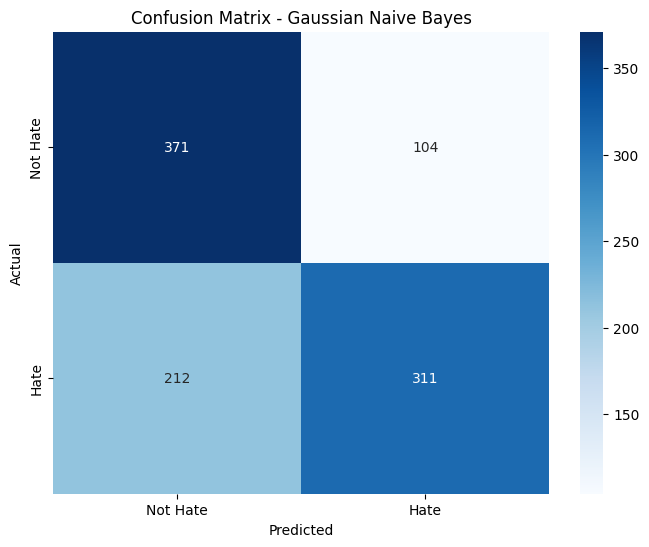

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Hate', 'Hate'],
            yticklabels=['Not Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()